In [1]:
import sympy
import numpy
from matplotlib import pyplot
import ipywidgets

In [2]:
sympy.init_printing()

In [3]:
u_max = sympy.symbols('u_max')
u_star = sympy.symbols('u_star')
rho_max = sympy.symbols('rho_max')
rho_star = sympy.symbols('rho_star')
A, B = sympy.symbols('A B')

In [4]:
u_max

In [5]:
u_max + u_star

In [7]:
# No traffic flux at max density
eq1 = sympy.Eq(0, rho_max * u_max * (1 - A * rho_max - B * rho_max**2))
eq1

In [10]:
# Maximum flux when rho = rho_star
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq2

In [12]:
# Velocity u_star when rho = rho_star
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))
eq3

In [13]:
eq2 - 3 * eq3

In [14]:
eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)
eq4

In [15]:
eq4.simplify()

In [20]:
rho_star_sol = sympy.solve(eq4, rho_star)[0]

rho_star_sol

In [21]:
type(rho_star_sol)

sympy.core.mul.Mul

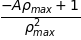

In [22]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

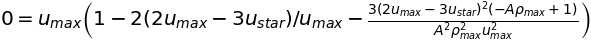

In [23]:
eq5 = eq2.subs([(rho_star, rho_star_sol), (B, B_sol)])
eq5

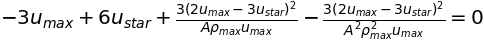

In [24]:
eq5.simplify()

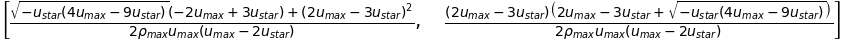

In [25]:
A_sol = sympy.solve(eq5, A)
A_sol

In [28]:
A_val_0 = A_sol[0].evalf(subs={rho_max: 10.0, u_max: 1.0, u_star: 0.7})
A_val_0

In [29]:
A_val_1 = A_sol[1].evalf(subs={rho_max: 10.0, u_max: 1.0, u_star: 0.7})
A_val_1

In [30]:
A_val = max(A_val_0, A_val_1)
A_val

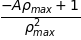

In [31]:
B_sol

In [32]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

In [33]:
def cubic_flux(rho, u_max, A, B):
    F = rho * u_max * (1 - A * rho - B * rho**2)
    return F

In [34]:
rho_max = 10.0
u_max = 1.0

L = 4.0
nx = 81
dx = L / (nx - 1)
x = numpy.linspace(0.0, L, num=nx)

In [35]:
rho0 = numpy.zeros_like(x)
mask = x < 2.0
rho0[mask] = rho_max * x[mask] / 2

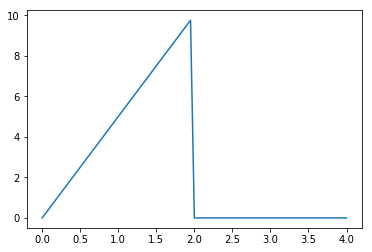

In [36]:
pyplot.plot(x, rho0);

In [56]:
def flux(rho, rho_max, u_max):
    F = rho * u_max * (1 - rho / rho_max)
    return F

In [68]:
def ftbs(rho0, rho_max, u_max, nt, dx, dt):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    F = flux(rho, rho_max, u_max)
    for n in range(nt):
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        rho_hist.append(rho.copy())
    return rho_hist

In [78]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('Time step: {}'.format(n))
    pyplot.xlabel('Road [km]')
    pyplot.ylabel('Traffic Density [cars/hr]')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(0.0, 11.0)
    pyplot.show()

In [79]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                     description='Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider,
                               x=ipywidgets.fixed(x),
                               rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [80]:
sigma = 1
dt = sigma * dx / u_max
nt = 30

rho_hist = ftbs(rho0, rho_max, u_max, nt, dx, dt)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…

In [88]:
def lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, u_max, rho_max)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt * (F[2:] - F[:-2]) / (2 * dx))
        rho_hist.append(rho.copy())
    return rho_hist

In [90]:
sigma = 1
dt = sigma * dx / u_max
nt = 30

rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…